In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [98]:
url = "D:\Python\input\Ecommerce_Customers"

In [99]:
ecom = pd.read_csv(url)

In [100]:
print(ecom.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB
None


In [101]:
ecom = ecom.drop(columns=['Email','Address','Avatar','Time on Website'],axis =1)

In [102]:
ecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(4)
memory usage: 15.8 KB


In [103]:
ecom.describe()

,Avg. Session Length,Time on App,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,3.533462,499.314038
std,0.992563,0.994216,0.999278,79.314782
min,29.532429,8.508152,0.269901,256.670582
25%,32.341822,11.388153,2.930450,445.038277
50%,33.082008,11.983231,3.533975,498.887875
75%,33.711985,12.753850,4.126502,549.313828
max,36.139662,15.126994,6.922689,765.518462


In [104]:
ecom.head()

,Avg. Session Length,Time on App,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,4.082621,587.951054
1,31.926272,11.109461,2.664034,392.204933
2,33.000915,11.330278,4.104543,487.547505
3,34.305557,13.717514,3.120179,581.852344
4,33.330673,12.795189,4.446308,599.406092


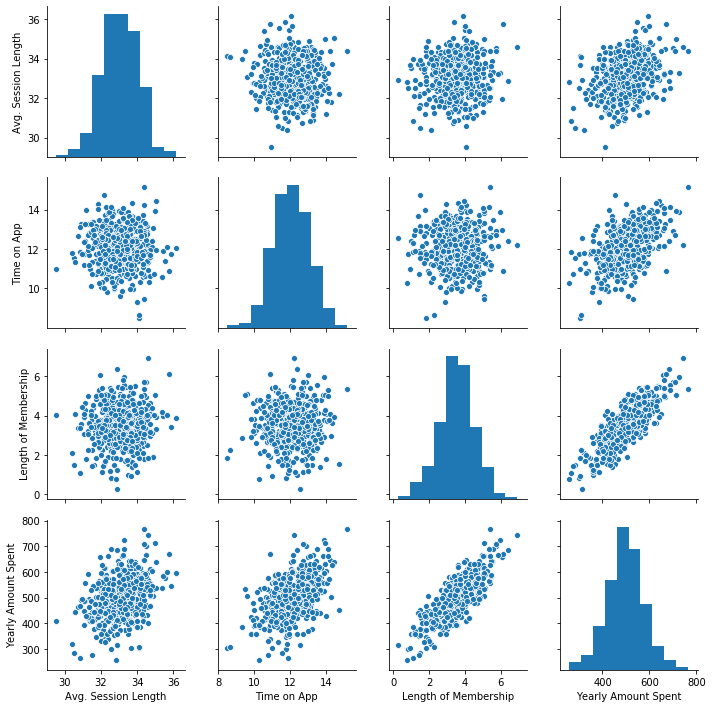

In [105]:
sns.pairplot(ecom)

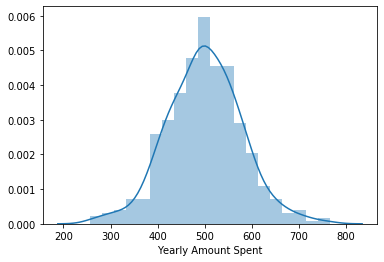

In [106]:
sns.distplot(ecom['Yearly Amount Spent'])

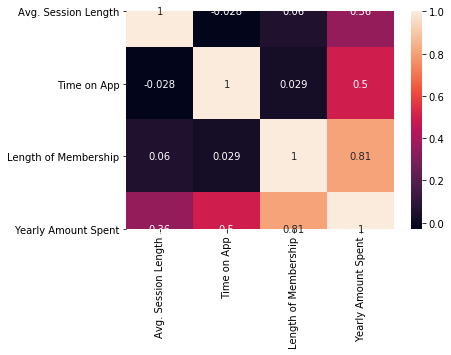

In [107]:
sns.heatmap(ecom.corr(),annot=True)

In [108]:
ecom.columns

Index(['Avg. Session Length', 'Time on App', 'Length of Membership',
       'Yearly Amount Spent'],
      dtype='object')

In [109]:
X = ecom[['Avg. Session Length', 'Time on App','Length of Membership']]

In [110]:
X.shape

(500, 3)

In [111]:
y = ecom['Yearly Amount Spent']

In [112]:
from sklearn.model_selection import train_test_split

In [113]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.4,random_state=101)

In [114]:
from sklearn.linear_model import LinearRegression,Lasso

In [115]:
lr = LinearRegression()

In [116]:
lr.fit(X_train,y_train)

LinearRegression()

In [117]:
lr.coef_

array([25.70145245, 37.95507876, 61.59981414])

In [118]:
lr.intercept_

-1025.2433259949864

In [119]:
ecom_p = pd.DataFrame(lr.coef_,X.columns,columns=['Coefficient'])

In [120]:
ecom_p

,Coefficient
Avg. Session Length,25.701452
Time on App,37.955079
Length of Membership,61.599814


In [121]:
prediction = lr.predict(X_test)

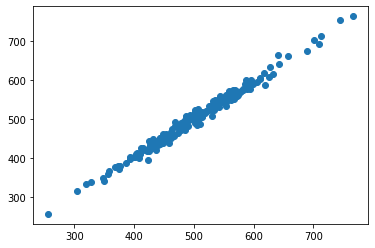

In [122]:
plt.scatter(y_test,prediction)

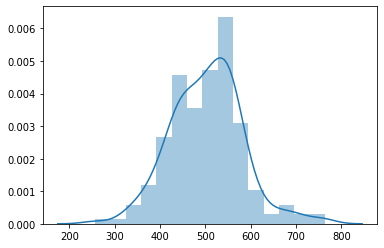

In [123]:
sns.distplot((prediction))

In [124]:
from sklearn import metrics

In [125]:
MAE = metrics.mean_absolute_error(y_test,prediction)

In [126]:
MAE

7.714142430963425

In [127]:
RR = metrics.r2_score(y_test,prediction)

In [128]:
RR

0.9855119430244027

In [66]:
for i in [10,100, 1000, 10000, 100000, 1000000, 10000000]:
    lasso = Lasso(alpha=i)
    lasso.fit(X_train_std, y_train)
    pred_lasso = lasso.predict(X_test_std)
    print("Lambda is "+str(i)+" ", lasso.coef_)
    print(metrics.mean_absolute_error(y_test,pred_lasso))
    print(metrics.r2_score(y_test,pred_lasso))

Lambda is 10  [15.8608181  29.17491813 -0.         51.4441232 ]
16.919403643792563
0.9288319460015598
Lambda is 100  [0. 0. 0. 0.]
61.554533987133276
-0.01092498817553178
Lambda is 1000  [0. 0. 0. 0.]
61.554533987133276
-0.01092498817553178
Lambda is 10000  [0. 0. 0. 0.]
61.554533987133276
-0.01092498817553178
Lambda is 100000  [0. 0. 0. 0.]
61.554533987133276
-0.01092498817553178
Lambda is 1000000  [0. 0. 0. 0.]
61.554533987133276
-0.01092498817553178
Lambda is 10000000  [0. 0. 0. 0.]
61.554533987133276
-0.01092498817553178


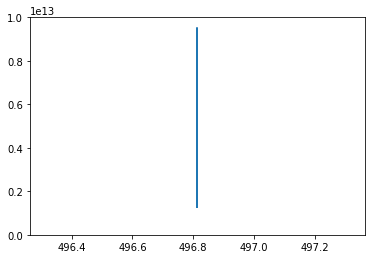

In [67]:
sns.distplot((pred_lasso))